# GRIP :- The spark Foundation

## Author:- Aniket Baban Mali

## Data science& Buisness Analytics Intern

## Batch:-June 2022

## Task1:-Predicting the percentage of an student based on the no.of study hrs

### Importing the trequired laibaries

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline

## Loading the data set 

### Dataset Source:-  http://bit.ly/w-data

In [165]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)

In [166]:
## Checking the head of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [167]:
## Checking the shape of the data
data.shape

(25, 2)

In [168]:
## Checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [169]:
## Checking for the null values 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [170]:
## Checking the distribution of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## EDA & Data visualization

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

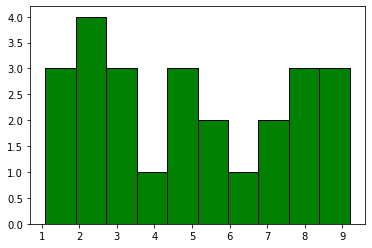

In [171]:
## Checking for the Hours
## Histogram
plt.hist(data['Hours'],color='green',edgecolor='black')

<AxesSubplot:ylabel='Density'>

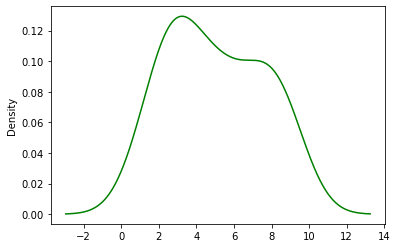

In [172]:
## Density plot
data.Hours.plot.density(color='green')

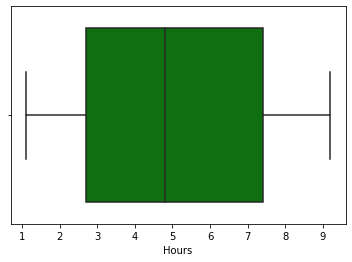

In [173]:
## Boxplot
sns.boxplot(data['Hours'],color='green')
import warnings
warnings.filterwarnings('ignore')

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <BarContainer object of 10 artists>)

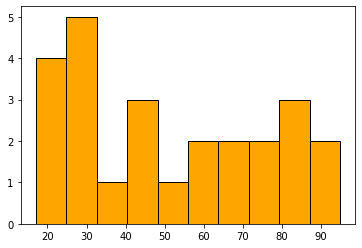

In [174]:
## Checking for the Scores
## histogram
plt.hist(data['Scores'],color='orange',edgecolor='black')

<AxesSubplot:ylabel='Density'>

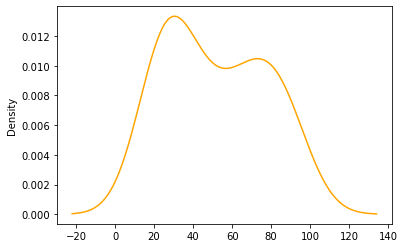

In [175]:
## Density plot
data.Scores.plot.density(color='orange')

<AxesSubplot:xlabel='Scores'>

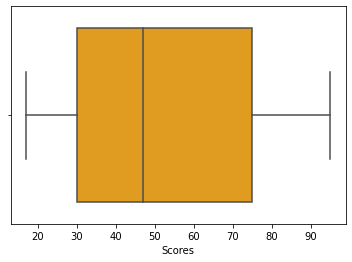

In [176]:
## Box plot 
sns.boxplot(data['Scores'],color='orange')

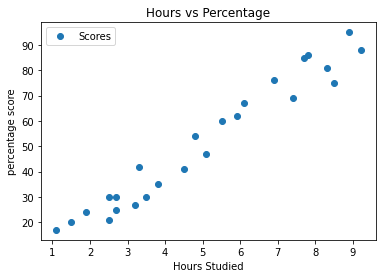

In [177]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('percentage score')  
plt.show()

## From above graph we can clearly view that there is positive relationship between percentage score & Hours studied.

## Preparing the data

In [178]:
## Seprating target & feature vale
x=data.drop(['Scores'],axis=1)
y=data['Scores']

### The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [179]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [180]:
## Checking shape 
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [181]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [182]:
## Traning of the model
model=LinearRegression()
model.fit(x_train,y_train)
print("Traning complete")

Traning complete


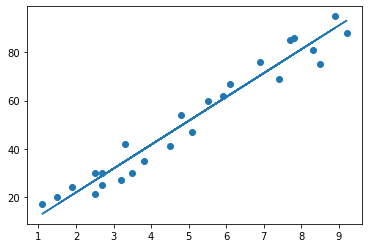

In [183]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [184]:
## predicting the test data
y_pred=model.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [185]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### prediction of the score if the student studies for 9.25 hrs/day

In [187]:
# You can also test with your own data
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred = model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Model evaluation

### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [196]:
## Mean absolute error
error=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:', error) 

Mean Absolute Error: 4.183859899002975


In [197]:
## Mean squared error
error2=mean_squared_error(y_test,y_pred)
print('Mean squared Error:', error2) 

Mean squared Error: 21.5987693072174


In [200]:
## R2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356